Bài tập code tuần 3: Lấy một chuỗi thời gian bất kỳ mà em quan tâm, tách ra thành phần xu thế  và phân tích việc ứng dụng chuỗi thành phần xu thế vào cuộc sống 

# Tách xu hướng bằng phương pháp lọc trung bình trượt 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [33]:
# Dữ liệu giá chứng khoán Vietcombank qua các năm 2009-2021
df = pd.read_csv('E:\Documents\Time Series\code\data\VCB.csv')

In [16]:
data = df[['<DTYYYYMMDD>', '<Close>']]

In [17]:
data['<DTYYYYMMDD>'] = pd.to_datetime(data['<DTYYYYMMDD>'], format='%Y%m%d')

C:\Users\COMPUTER\AppData\Local\Temp/ipykernel_10432/3205330306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['<DTYYYYMMDD>'] = pd.to_datetime(data['<DTYYYYMMDD>'], format='%Y%m%d')


In [19]:
data_2021 = data[data['<DTYYYYMMDD>'].dt.year ==2021]

In [21]:
data_2021['<DTYYYYMMDD>'] = data_2021["<DTYYYYMMDD>"].dt.date
data_2021.set_index("<DTYYYYMMDD>", inplace=True)
data_2021 = data_2021.asfreq("D")

C:\Users\COMPUTER\AppData\Local\Temp/ipykernel_10432/2188555413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['<DTYYYYMMDD>'] = data_2021["<DTYYYYMMDD>"].dt.date


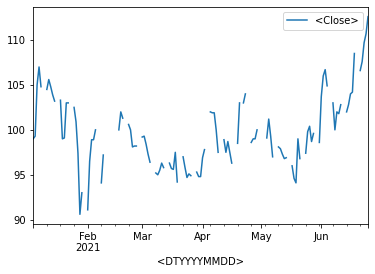

In [22]:
data_2021.plot()
plt.show()

In [23]:
data_2021 = data_2021.dropna()

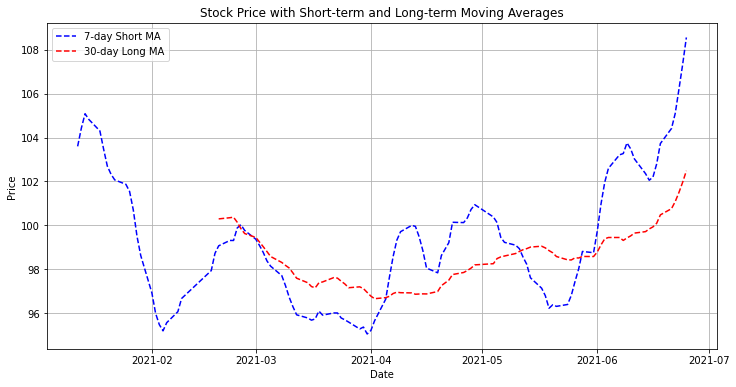

In [35]:
short_window = 7  # Short-term moving average window
long_window = 30  # Long-term moving average window

# Calculate short-term and long-term moving averages
data_2021['Short_MA'] = data_2021['<Close>'].rolling(window=short_window).mean()
data_2021['Long_MA'] = data_2021['<Close>'].rolling(window=long_window).mean()

# Plot the stock price, short-term MA, and long-term MA
plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['<Close>'], label='Stock Price', color='black')
plt.plot(data_2021.index, data_2021['Short_MA'], label=f'{short_window}-day Short MA', linestyle='--', color='blue')
plt.plot(data_2021.index, data_2021['Long_MA'], label=f'{long_window}-day Long MA', linestyle='--', color='red')

plt.title('Stock Price with Short-term and Long-term Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#  Tách thành phần xu thế bằng phương pháp mũ 

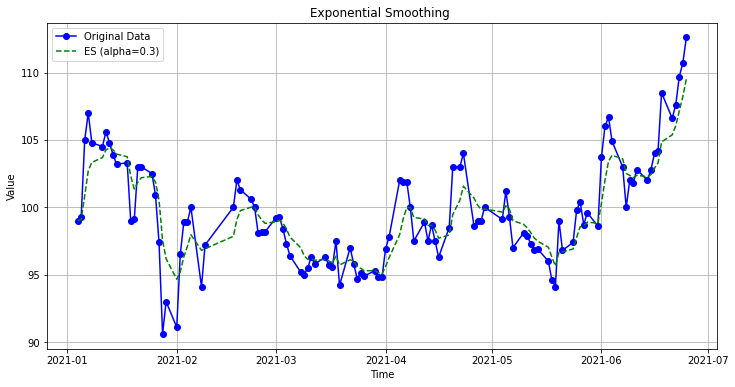

In [32]:
ETS = []
alpha=0.3

# Initialize the first level value with the first data point
ETS.append(data_2021['<Close>'][0])

# Calculate the level component using the formula
for i in range(1, len(data_2021)):
    m_hat = alpha * data_2021['<Close>'][i] + (1 - alpha) * ETS[i - 1]
    ETS.append(m_hat)

# Plot the original data and the calculated level component
plt.figure(figsize=(12, 6))
plt.plot(data_2021.index, data_2021['<Close>'], label='Original Data', marker='o', color='blue')
plt.plot(data_2021.index, ETS, label=f'ES (alpha={alpha})', linestyle='--', color='green')

plt.title('Exponential Smoothing ')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()






 # Phân tính ứng dụng

* Dựa vào việc tách các thành phần xu thế (trend) ta có thể gia quyết định, mua bán cổ phiếu hợp lí
* Dựa vào xu thế VCB 2021, ta thấy trend đi lên, tức giá tăng cao, người nắm giữ cổ phiếu có thể bán ở một mức giá nhằm thu lời nhất định, người mua có thể mua cổ phiếu vào dự trữ nhằm chờ xu hướng tăng